In [83]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from tqdm import tqdm 
from scipy.optimize import curve_fit
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colors
import os
import glob
from labellines import *
import math
from PIL import Image

divergent=LinearSegmentedColormap.from_list('divergent', (
    # Edit this gradient at https://eltos.github.io/gradient/#0D7D87-99C6CC-FBFBFB-EE9093-C31E23
    (0.000, (0.051, 0.490, 0.529)),
    (0.250, (0.600, 0.776, 0.800)),
    (0.500, (0.984, 0.984, 0.984)),
    (0.750, (0.933, 0.565, 0.576)),
    (1.000, (0.765, 0.118, 0.137))))

my_gradient = LinearSegmentedColormap.from_list('my_gradient', (
    # Edit this gradient at https://eltos.github.io/gradient/#0:0D7D87-20.8:99C6CC-40:B6B66B-60:F47A00-80:EE9093-100:C31E23
    (0.000, (0.051, 0.490, 0.529)),
    (0.208, (0.600, 0.776, 0.800)),
    (0.400, (0.714, 0.714, 0.420)),
    (0.600, (0.957, 0.478, 0.000)),
    (0.800, (0.933, 0.565, 0.576)),
    (1.000, (0.765, 0.118, 0.137))))
#Formatting for plots
plt.rcParams.update({'font.size': 16})
plt.rcParams["font.family"] = "Times New Roman"
plt.style.use('bmh')
# DiscModel is in a different file
from src.DiscModel import DiscGalaxy
N = 1000000 # number of stars in the disc
a = 1 # a is the scale length of the disc in kpc
D = DiscGalaxy(N=N,a=a)

rmax = 212.
nbins = 64
mmax = 10
nmax = 10

noise = 0.5

"""Recall m corresponds to Fourier (azimuthal) modes, n corresponds to Laguerre (radial harmonics) modes."""

'Recall m corresponds to Fourier (azimuthal) modes, n corresponds to Laguerre (radial harmonics) modes.'

Image size: 562x562 pixels


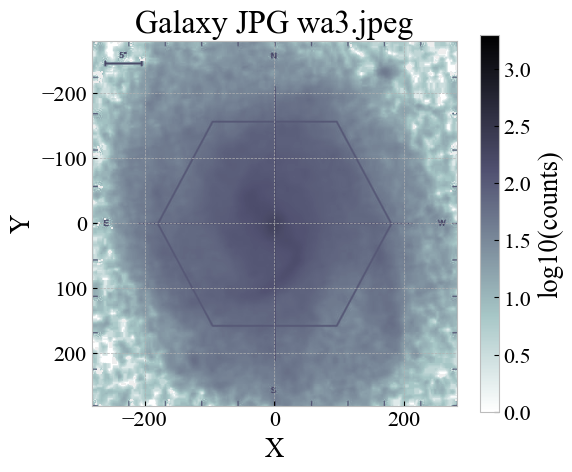

Amn (rows = n, columns = m):
[[10533.392   359.389   561.506   110.09    114.985    57.943    60.962
     36.998   101.718]
 [11037.005   199.197  1017.275   241.535   224.969   120.318   151.45
    101.367   215.838]
 [11245.215   192.323  1227.766   339.687   475.109   235.836    90.623
    170.911   153.192]
 [ 9837.4     355.945  1344.293   422.805   903.69    329.808   122.358
    280.213    73.955]
 [ 8206.27    517.368   352.939   578.297   583.341   306.619   131.664
    309.922   155.559]
 [ 6051.067  1109.799   659.152   392.741   458.284   245.554   109.474
    231.743    90.83 ]
 [ 3065.061  1084.447  1633.009   491.838   541.45    273.557   299.142
    257.889   155.453]
 [ 1099.715   376.484  1483.231   692.339   896.739   386.011   442.679
    241.406    99.116]]


Processing inclinations: 100%|██████████| 8/8 [04:35<00:00, 34.48s/inclination]

0.13555718388809643 -0.005391496947683338



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/labellines/core.py:267: UserWarning: The value at position 0 in `xvals` is outside the range of its associated line (xmin=np.float64(0.012991013943123825), xmax=np.float64(0.01299101394312388), xval=0.13143062175868553). Clipping it into the allowed range.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/labellines/core.py:267: UserWarning: The value at position 1 in `xvals` is outside the range of its associated line (xmin=np.float64(0.05042512867163984), xmax=np.float64(0.05042512867163995), xval=0.24472068140835324). Clipping it into the allowed range.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/labellines/core.py:267: UserWarning: The value at position 2 in `xvals` is outside the range of its associated line (xmin=np.float64(0.1165659742878063), xmax=np.float64(0.1165659742878064), xval=0.35801074105802

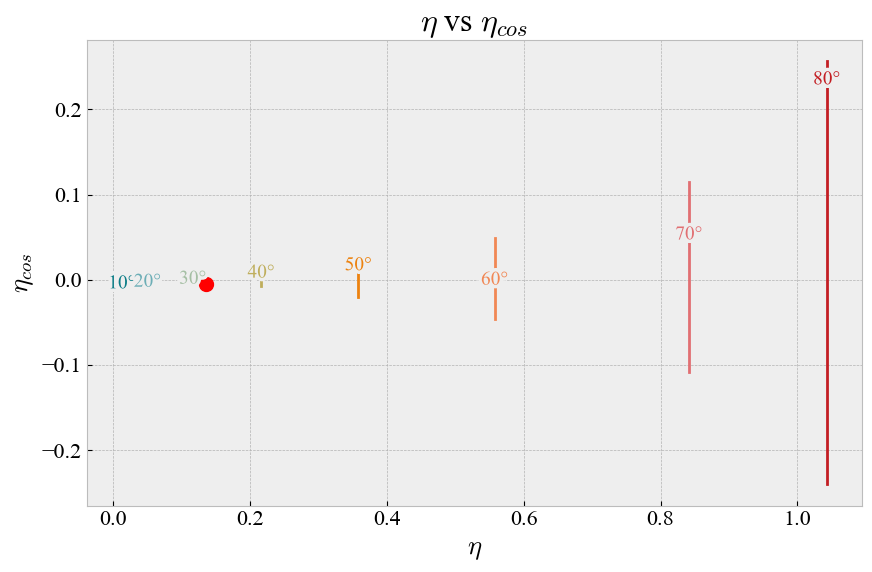

In [82]:
file="wa3.jpeg"  # replace with your image file
rmax = 281  # radius in pixels, adjust as needed
img_pil = Image.open(file).convert("L")
w, h    = img_pil.size
print(f"Image size: {w}x{h} pixels")
img_incl = np.array(img_pil, dtype=float)

x_edges = np.linspace(-rmax, rmax, w)
y_edges = np.linspace(rmax, -rmax, h)

safe     = np.where(img_incl>0, img_incl, np.nan)
log_img  = np.log10(safe)

plt.figure(figsize=(6,5))
plt.imshow(
    log_img, cmap="bone_r",
    extent=[x_edges[0],x_edges[-1],y_edges[0],y_edges[-1]],
    vmin=0, vmax=3.3
)
plt.colorbar(label="log10(counts)")
plt.title(f"Galaxy JPG {file}")
plt.xlabel("X")
plt.ylabel("Y")
plt.tight_layout()
plt.show()

D = DiscGalaxy(N=N, a=a)
D.img     = img_incl
D.x_edges = x_edges
D.y_edges = y_edges
D.x_centers = x_edges
D.y_centers = y_edges


E1 = D.make_expansion(mmax, nmax, 20, noisy=False)
E1.laguerre_reconstruction(D.r, D.p)



coscoefstrue = E1.coscoefs
sincoefstrue = E1.sincoefs

Amn = np.sqrt(coscoefstrue**2 +sincoefstrue**2) 

Amn_matrix = Amn.T 

print("Amn (rows = n, columns = m):")
print(np.round(Amn_matrix,3)) 


# the grid of inclinations to draw curves for:
incl_list = np.linspace(10, 80, 8)     # eight sample inclinations
PA_list   = np.linspace(0, 80, 41)     # fine PA sampling
colorindx = np.linspace(0, 1, len(incl_list+1))  # color index for inclinations
plt.figure(figsize=(9, 6))

i=0

for inc in tqdm(incl_list, desc="Processing inclinations", unit="inclination"):
    etas      = []
    eta_cos = []
    for PA in PA_list:
        # generate the galaxy
        D = DiscGalaxy(N=N, a=a)
        D.rotate_disc(inc, 0, PA)
        D.generate_image(rmax=rmax, nbins=nbins, noiselevel=noise)
        E = D.make_pointexpansion(mmax, nmax, 20)

        c = E.coscoefs; s = E.sincoefs

        num_cos = sum(c[2,n] for n in range(nmax))
        num_sin = sum(s[2,n] for n in range(nmax))
        num     = sum(np.hypot(c[2,n], s[2,n]) for n in range(nmax))
        den     = sum(abs(c[0,n])            for n in range(nmax))

        eta     = num/den if den else np.nan
        etacos  = num_cos/den if den else np.nan
        

        etas.append(eta)
        eta_cos.append(etacos) 

    # plot one curve (inc fixed, PA varying)
    plt.plot(etas, eta_cos, '-', label=f"{inc:.0f}°", color=my_gradient(colorindx[i]))
    i += 1
    
plt.xlabel(r"$\eta$")
plt.ylabel(r"$\eta_{cos}$")
labelLines(plt.gca().get_lines(),align=False,fontsize=14)
plt.title(r"$\eta$ vs $\eta_{cos}$")
plt.grid(True)

# now do the blind test and overplot a big marker


num_cos = sum(coscoefstrue[2,n] for n in range(nmax))

num     = sum(np.hypot(coscoefstrue[2,n], sincoefstrue[2,n]) for n in range(nmax))
den     = sum(abs(coscoefstrue[0,n])            for n in range(nmax))

eta_bt     = num/den
eta_cos_bt = num_cos/den


# big red dot
plt.plot(eta_bt, eta_cos_bt, 'o', color='red', markersize=10, label="Blind Test")
print(eta_bt, eta_cos_bt)
plt.tight_layout()
plt.show()



Image size: 562x562 pixels, radius=300 pixels


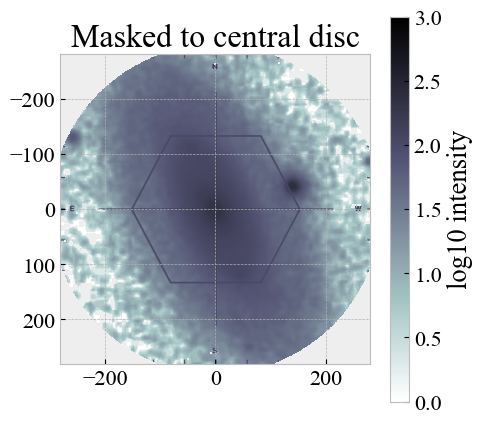

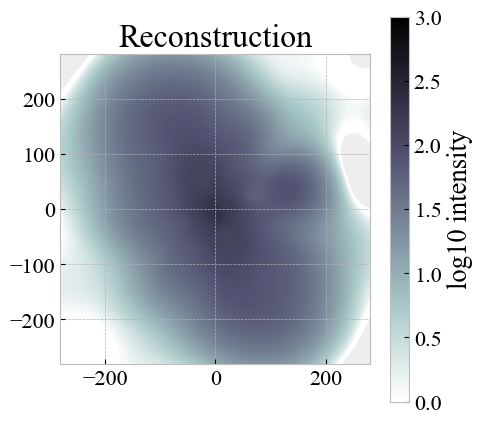

Amn (rows = n, columns = m):
[[16221.   253.  2836.   206.   611.   159.   118.   108.   178.]
 [10257.   741.  5188.   649.  1900.   535.   352.   450.   291.]
 [ 6321.   875.  4852.   745.  2549.   677.   526.   523.   542.]
 [ 1527.   192.  3000.   111.  1339.    59.   483.   145.   114.]
 [  979.   509.   404.   436.   626.   362.   388.   424.   349.]
 [  481.   282.  1894.   273.   489.   222.   216.   247.   310.]
 [   29.   213.   399.   114.   508.   137.   372.   172.   225.]
 [  193.   408.  1598.   304.   445.   341.   312.   315.   320.]]
reconimg= 10522356.999999994
Sum= 10961227.0 (562, 562)


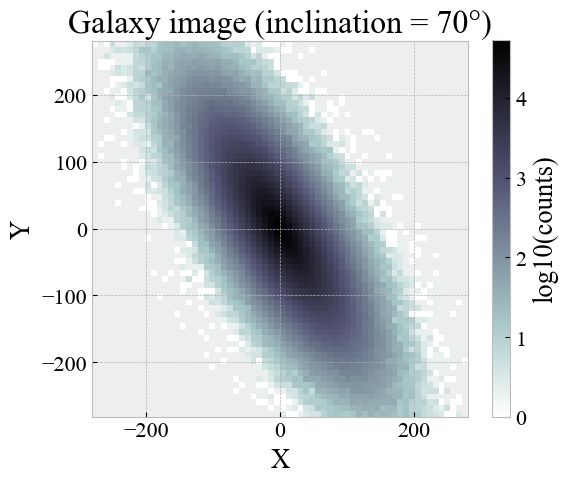

Amn inc= 70 (rows = n, columns = m):
[[15091.     9. 10818.    24.  6300.     2.  1769.    13.  1008.]
 [ 8525.     7.  2092.    22.  3832.     5.   394.     7.  2122.]
 [ 4707.     8.   826.    16.  4024.    10.   426.     9.  2599.]
 [ 2653.    10.  1342.    10.  4309.    13.   191.    14.  2957.]
 [ 1495.    12.  1173.     4.  4472.    15.   178.    16.  3293.]
 [  815.    12.   866.     5.  4482.    18.   237.    15.  3574.]
 [  403.    11.   590.     9.  4360.    19.   279.    14.  3778.]
 [  144.     9.   389.    13.  4140.    19.   311.    13.  3904.]]
Amn difference (rows = n, columns = m):
[[ 1131.   244. -7982.   182. -5689.   157. -1651.    96.  -831.]
 [ 1732.   734.  3096.   627. -1932.   530.   -42.   443. -1832.]
 [ 1614.   867.  4026.   729. -1475.   667.    99.   514. -2058.]
 [-1127.   182.  1658.   101. -2970.    46.   292.   131. -2843.]
 [ -516.   497.  -769.   432. -3846.   347.   209.   408. -2944.]
 [ -334.   270.  1028.   268. -3993.   204.   -21.   232. -3264.

Text(0.5, 1.0, 'Amn difference Simulation vs Image')

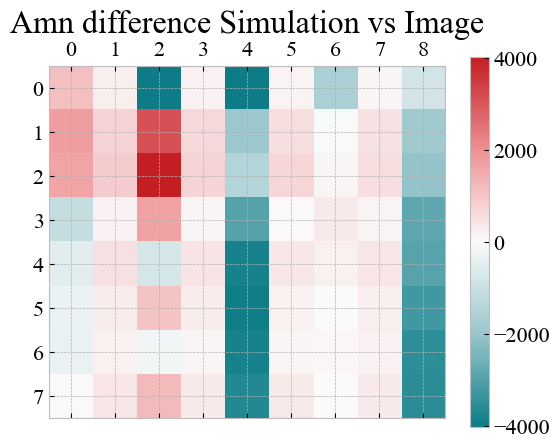

In [86]:
rmax= 281

#Load the image as a 2D float array
file = "wa2.jpeg"
gray = np.array(Image.open(file).convert("L"), dtype=float)  # shape (h, w)

h, w = gray.shape
cx, cy = w//2, h//2
radius = 300  # in pixels
print(f"Image size: {w}x{h} pixels, radius={radius} pixels")
# Build the circular mask
y, x = np.indices((h,w))
mask = (x - cx)**2 + (y - cy)**2 <= radius**2
x_edges = np.linspace(-rmax, rmax, w)
y_edges = np.linspace(rmax, -rmax, h)


# Apply it: keep the disc, zero (or nan) outside
disc_only = np.where(mask, gray, 0.0)

#Quick check that only the central disc remains
plt.figure(figsize=(5,5))
plt.imshow(np.log10(np.where(disc_only>0, disc_only, np.nan)), extent=[x_edges[0],x_edges[-1],y_edges[0],y_edges[-1]],
           cmap='bone_r',
           vmin=0, vmax=3)
plt.colorbar(label='log10 intensity')
plt.title("Masked to central disc")
plt.show()

#feed into original DiscGalaxy pipeline
  # physical half‐width of the image
# set up your grid exactly as before:
x_edges = np.linspace(-rmax, rmax, w+1)
y_edges = np.linspace(-rmax, rmax, h+1)
x_centers = 0.5*(x_edges[:-1] + x_edges[1:])
y_centers = 0.5*(y_edges[:-1] + y_edges[1:])

D = DiscGalaxy(N=N,a=a)       # no N needed
D.img       = disc_only.T   # transpose → shape = (nx, ny)
D.x_edges   = x_edges
D.y_edges   = y_edges
D.x_centers = x_centers
D.y_centers = y_centers

# Expand & reconstruct just as you wrote originally
mmax, nmax = 8, 8
E1 = D.make_expansion(mmax, nmax, 40, noisy=False)
E1.laguerre_reconstruction(D.r, D.p)

# Histogram back & plot
X2, Y2   = np.meshgrid(x_centers, y_centers, indexing='ij')
x_flat   = X2.ravel();     y_flat   = Y2.ravel()
w_flat   = E1.reconstruction.ravel()

recon_img, _, _ = np.histogram2d(
    x_flat, y_flat,
    bins=[x_edges, y_edges],
    weights=w_flat
)
counts, _, _ = np.histogram2d(
    x_flat, y_flat,
    bins=[x_edges, y_edges]
)
recon_img = recon_img / np.maximum(counts, 1)
recon_img *= np.sum(disc_only) / np.sum(recon_img)
recon_img = recon_img.T

plt.figure(figsize=(5,5))
plt.imshow(np.log10(np.where(recon_img>0, recon_img, np.nan)), cmap='bone_r',
           extent=[x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]],
           vmin=0, vmax=3)
plt.colorbar(label='log10 intensity')
plt.title("Reconstruction")
plt.show()
np.set_printoptions(suppress=True) 
c = E1.coscoefs; s = E1.sincoefs
Amn = np.sqrt(E1.coscoefs**2 +E1.sincoefs**2) 
Amn_matrix = Amn.T 
print(f"Amn (rows = n, columns = m):")
print(np.round(Amn_matrix,0)) 

print('reconimg=',np.sum(recon_img))
print('Sum=',np.sum(gray),gray.shape)



inc=70
a=40
D = DiscGalaxy(N=N*3, a=a)  # adjust N and a as needed
D.rotate_disc(inc, 0, 120)
D.generate_image(rmax=rmax, nbins=nbins, noiselevel=noise)
img_orig = D.img.copy()

# Replace zero pixels with NaN to avoid log10(-inf) warnings

safe_img = np.where(D.img > 0, D.img, np.nan)
log_img = np.log10(safe_img)


"""Plotting the galaxy image"""

plt.figure(figsize=(6, 5))
plt.imshow(log_img, origin='lower', cmap='bone_r',
        extent=[D.x_edges[0], D.x_edges[-1], D.y_edges[0], D.y_edges[-1]])
plt.colorbar(label='log10(counts)')
plt.title(f"Galaxy image (inclination = {inc}°)")
plt.xlabel("X")
plt.ylabel("Y")
plt.tight_layout()
plt.show()



E1 = D.make_expansion(mmax,nmax,a*1.5,noisy=False) # Expanding the image 
c = E1.coscoefs; s = E1.sincoefs
Amndisc = np.sqrt(E1.coscoefs**2 +E1.sincoefs**2) 
Amndisc_matrix = Amndisc.T 
print(f"Amn inc= {inc} (rows = n, columns = m):")
print(np.round(Amndisc_matrix,0)) 


figure = plt.figure()
axes = figure.add_subplot(111)
Amndiff=Amn_matrix-Amndisc_matrix
print("Amn difference (rows = n, columns = m):")
print(np.round(Amndiff,0))



norm = colors.TwoSlopeNorm(
    vmin=-Amndiff.max(),   # most negative maps to one end
    vcenter=0,            # zero maps to center (white)
    vmax=Amndiff.max()    # most positive maps to the other end
)

caxes = axes.matshow(Amndiff, interpolation ='nearest',norm=norm, cmap=divergent)
figure.colorbar(caxes)

axes.set_title(f"Amn difference Simulation vs Image")



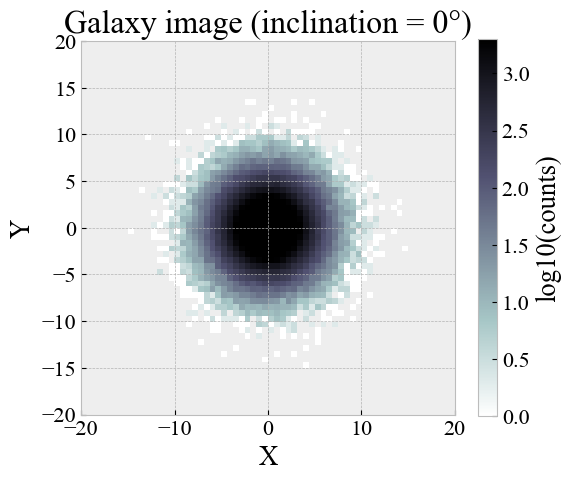

Amn inc= 0 (rows = n, columns = m):
[[0.153 0.001 0.    0.    0.    0.    0.001]
 [0.043 0.    0.    0.    0.    0.    0.   ]
 [0.01  0.001 0.    0.    0.    0.    0.   ]
 [0.002 0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.   ]]


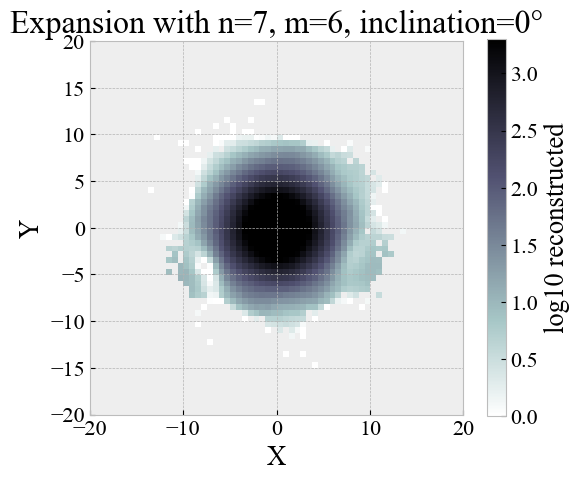

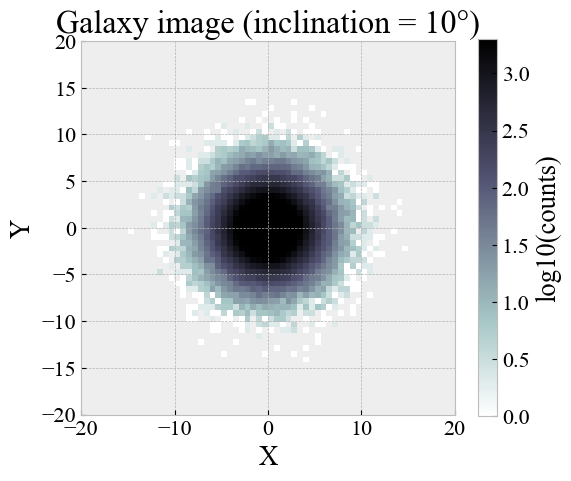

Amn inc= 10 (rows = n, columns = m):
[[0.154 0.001 0.001 0.    0.    0.    0.001]
 [0.044 0.    0.    0.    0.    0.    0.   ]
 [0.011 0.001 0.    0.    0.    0.    0.   ]
 [0.002 0.001 0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.   ]]


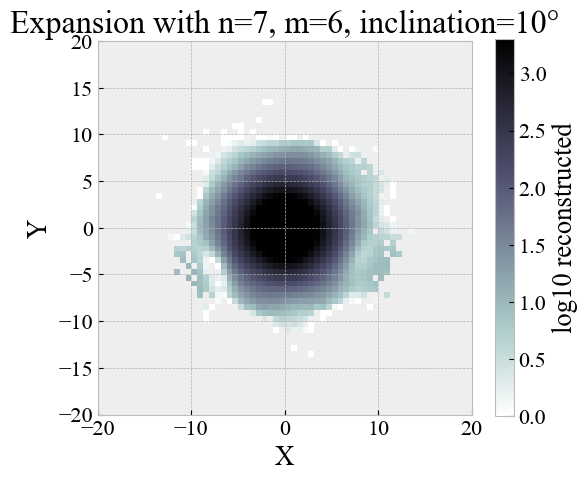

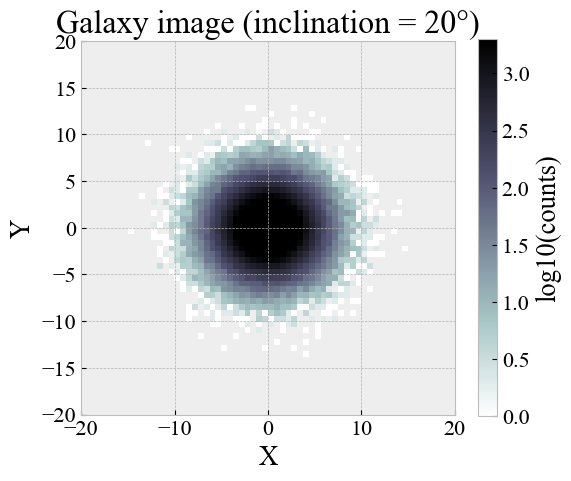

Amn inc= 20 (rows = n, columns = m):
[[0.156 0.001 0.006 0.    0.    0.    0.001]
 [0.047 0.    0.002 0.    0.    0.    0.   ]
 [0.012 0.001 0.001 0.    0.    0.    0.   ]
 [0.003 0.001 0.001 0.    0.    0.    0.   ]
 [0.001 0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.   ]]


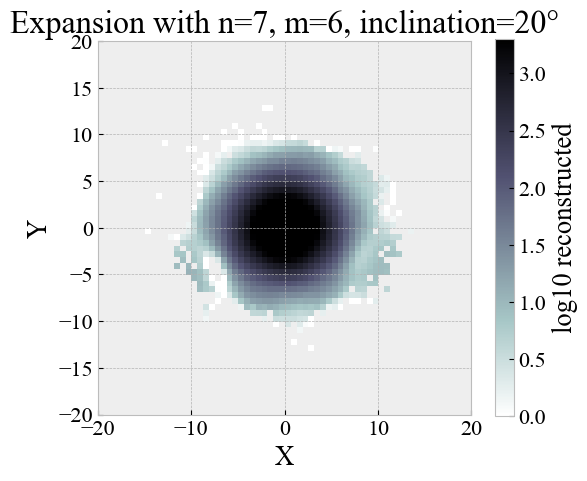

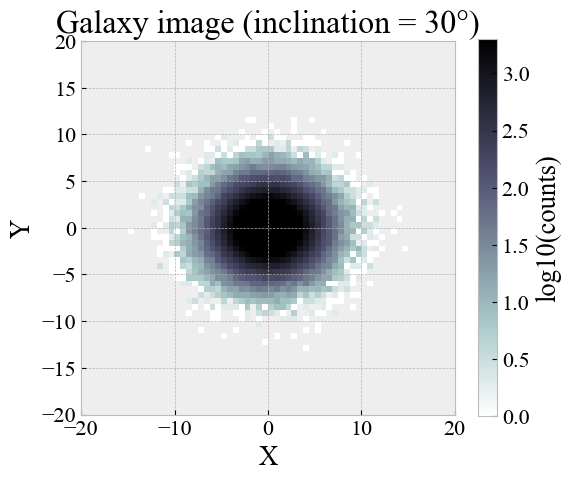

Amn inc= 30 (rows = n, columns = m):
[[0.161 0.001 0.014 0.    0.001 0.    0.001]
 [0.053 0.    0.003 0.    0.001 0.    0.   ]
 [0.015 0.001 0.003 0.    0.    0.    0.   ]
 [0.004 0.001 0.001 0.    0.    0.    0.   ]
 [0.001 0.    0.001 0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.   ]]


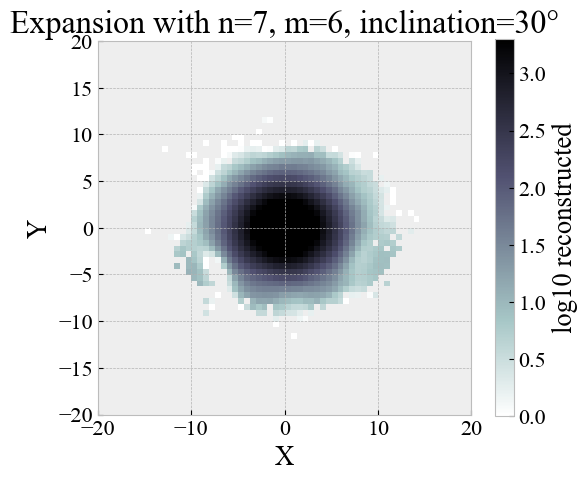

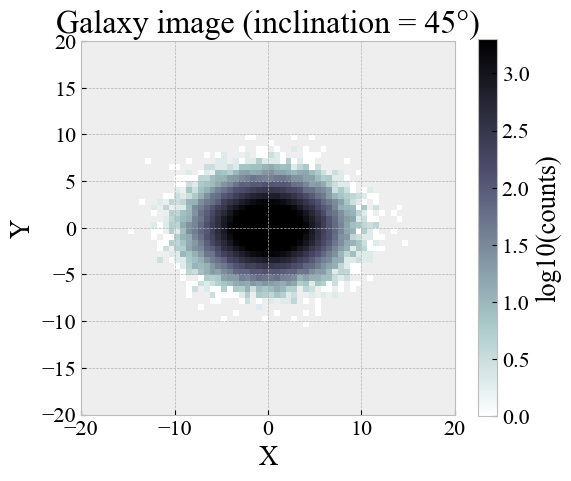

Amn inc= 45 (rows = n, columns = m):
[[0.172 0.001 0.038 0.    0.005 0.    0.001]
 [0.068 0.001 0.004 0.    0.002 0.    0.   ]
 [0.024 0.001 0.008 0.    0.001 0.    0.   ]
 [0.008 0.001 0.005 0.    0.    0.    0.   ]
 [0.003 0.001 0.002 0.    0.    0.    0.   ]
 [0.001 0.    0.001 0.    0.    0.    0.   ]
 [0.    0.    0.001 0.    0.    0.    0.   ]]


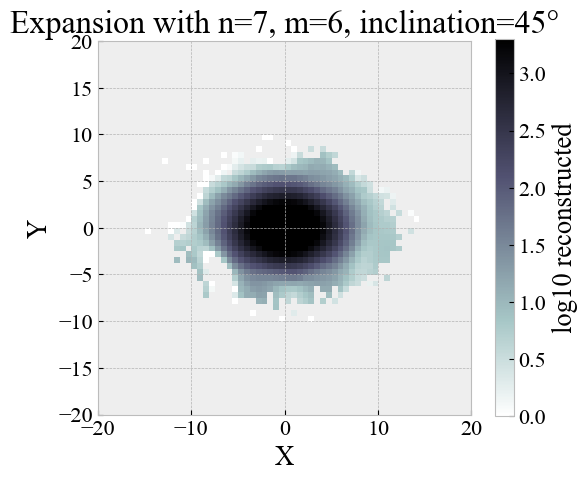

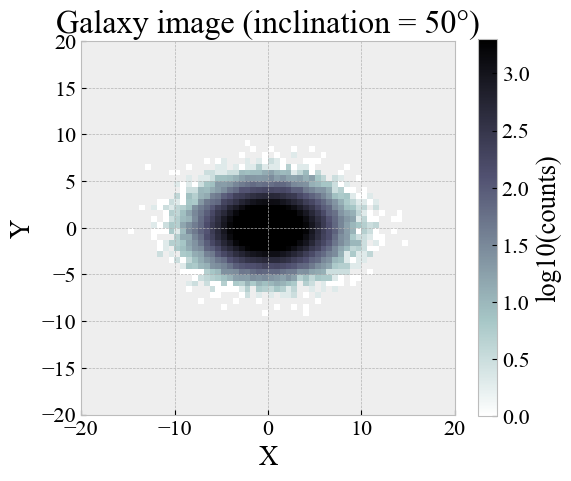

Amn inc= 50 (rows = n, columns = m):
[[0.177 0.001 0.05  0.    0.008 0.    0.002]
 [0.075 0.001 0.003 0.    0.003 0.    0.001]
 [0.029 0.001 0.01  0.    0.002 0.    0.   ]
 [0.011 0.001 0.007 0.    0.001 0.    0.   ]
 [0.004 0.001 0.003 0.    0.    0.    0.   ]
 [0.001 0.    0.002 0.    0.    0.    0.   ]
 [0.    0.    0.001 0.    0.    0.    0.   ]]


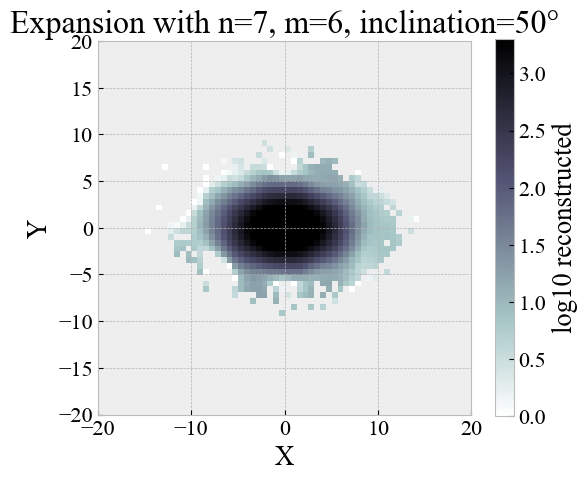

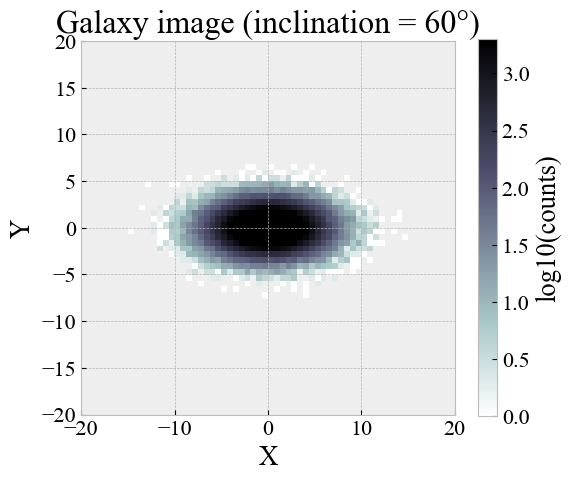

Amn inc= 60 (rows = n, columns = m):
[[0.188 0.001 0.086 0.    0.022 0.001 0.006]
 [0.092 0.001 0.004 0.    0.006 0.    0.003]
 [0.042 0.001 0.014 0.    0.006 0.    0.001]
 [0.02  0.001 0.012 0.    0.003 0.    0.   ]
 [0.009 0.001 0.008 0.    0.001 0.    0.   ]
 [0.004 0.001 0.005 0.    0.    0.    0.   ]
 [0.002 0.    0.003 0.    0.    0.    0.   ]]


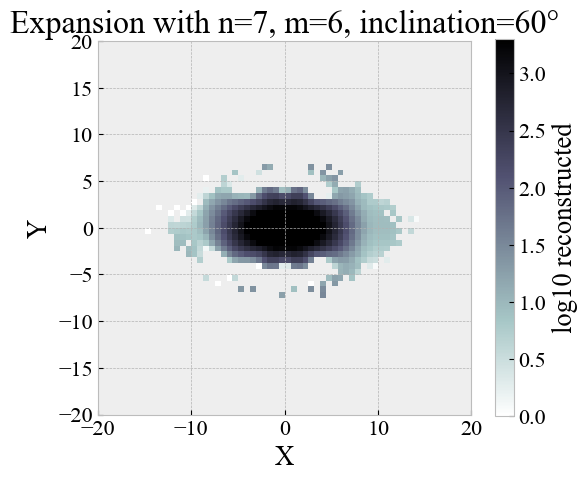

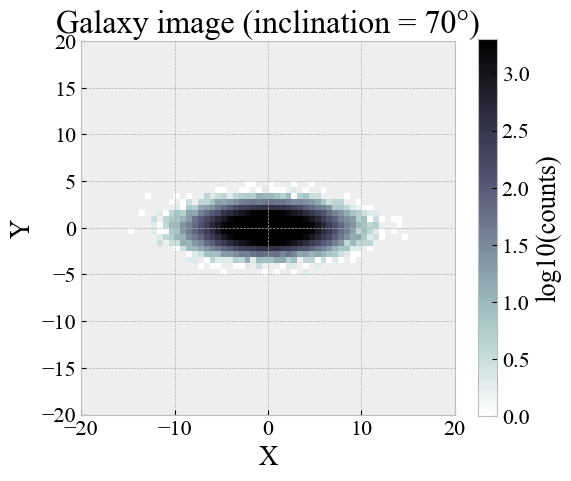

Amn inc= 70 (rows = n, columns = m):
[[0.202 0.001 0.146 0.    0.057 0.001 0.023]
 [0.115 0.001 0.029 0.    0.004 0.    0.006]
 [0.064 0.001 0.01  0.    0.013 0.    0.007]
 [0.037 0.001 0.017 0.001 0.01  0.    0.003]
 [0.022 0.001 0.016 0.    0.005 0.    0.001]
 [0.013 0.001 0.012 0.    0.003 0.    0.   ]
 [0.008 0.001 0.008 0.    0.001 0.    0.   ]]


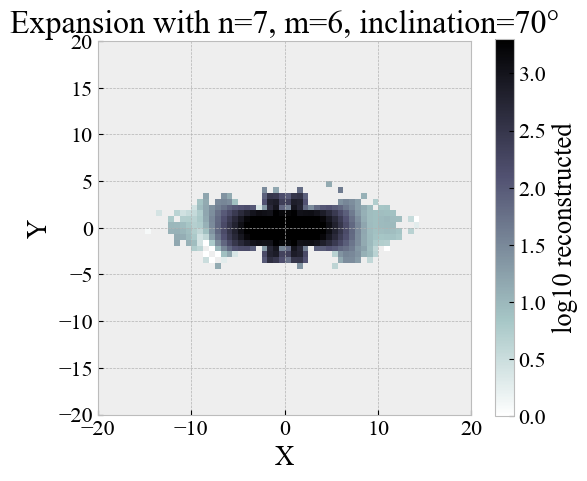

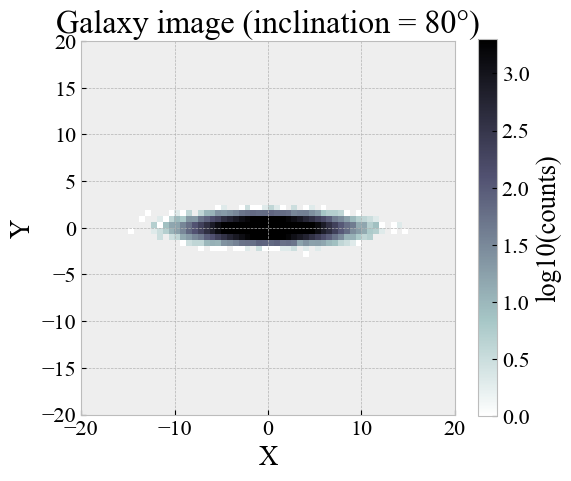

Amn inc= 80 (rows = n, columns = m):
[[0.215 0.001 0.25  0.001 0.151 0.    0.094]
 [0.142 0.001 0.102 0.    0.034 0.    0.007]
 [0.096 0.001 0.032 0.    0.008 0.001 0.016]
 [0.069 0.001 0.001 0.001 0.019 0.001 0.017]
 [0.051 0.001 0.011 0.001 0.018 0.    0.012]
 [0.039 0.001 0.016 0.001 0.015 0.    0.008]
 [0.03  0.001 0.017 0.    0.011 0.    0.004]]


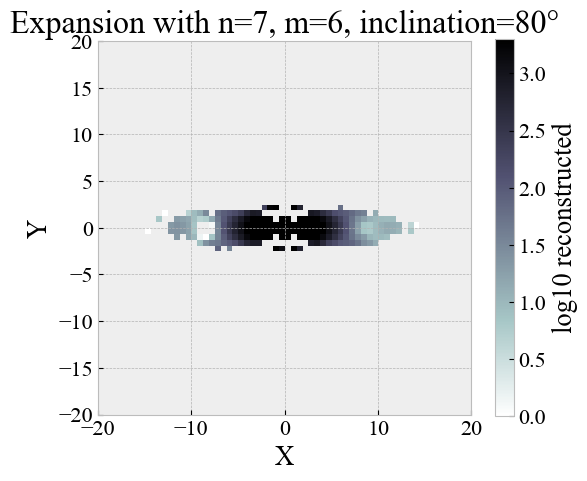

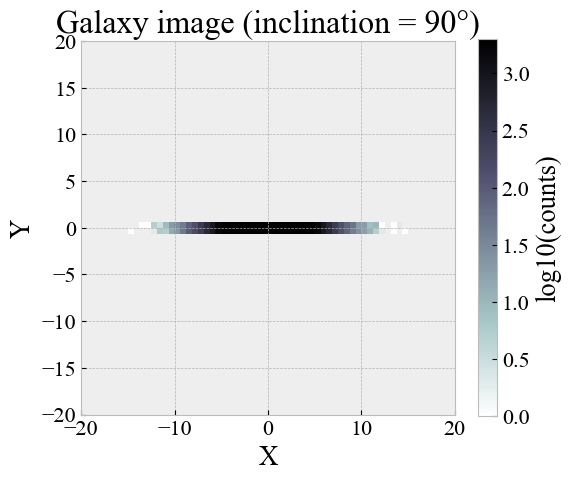

Amn inc= 90 (rows = n, columns = m):
[[0.224 0.    0.449 0.    0.449 0.    0.449]
 [0.163 0.    0.325 0.    0.325 0.    0.325]
 [0.126 0.    0.252 0.    0.252 0.    0.252]
 [0.106 0.001 0.211 0.001 0.211 0.001 0.211]
 [0.093 0.001 0.186 0.001 0.186 0.001 0.186]
 [0.084 0.001 0.168 0.001 0.168 0.001 0.168]
 [0.077 0.    0.155 0.    0.155 0.    0.155]]


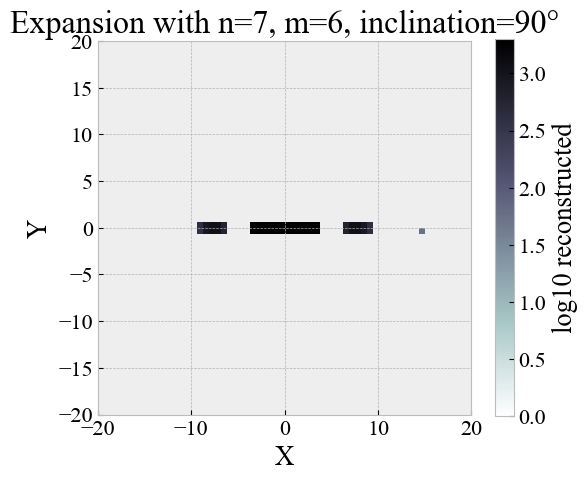

In [ ]:
rmax=20

inc = [0,10,20,30,45,50,60,70,80,90] # degrees, change as needed

for inc in inc:
    """Generating the galaxy image with the specified inclination"""
    D = DiscGalaxy(N=N, a=a)  # adjust N and a as needed
    D.rotate_disc(inc, 0, 0)
    D.generate_image(rmax=rmax, nbins=nbins, noiselevel=noise)
    img_orig = D.img.copy()

    # Replace zero pixels with NaN to avoid log10(-inf) warnings

    safe_img = np.where(D.img > 0, D.img, np.nan)
    log_img = np.log10(safe_img)


    """Plotting the galaxy image"""

    plt.figure(figsize=(6, 5))
    plt.imshow(log_img, origin='lower', cmap='bone_r',
            extent=[D.x_edges[0], D.x_edges[-1], D.y_edges[0], D.y_edges[-1]],
            vmin=0., vmax=3.3)
    plt.colorbar(label='log10(counts)')
    plt.title(f"Galaxy image (inclination = {inc}°)")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.tight_layout()
    plt.show()


    m,n=6,7 #Toggle this to see the expansion coefficients and how they change, goal: find the closest match to the image

    E1 = D.make_pointexpansion(m,n,a*1.5,noisy=False) # Expanding the image 
    c = E1.coscoefs; s = E1.sincoefs
    Amn = np.sqrt(E1.coscoefs**2 +E1.sincoefs**2) 
    Amn_matrix = Amn.T 
    print(f"Amn inc= {inc} (rows = n, columns = m):")
    print(np.round(Amn_matrix,3)) 
    
    """Reconstruct an image from the expansion coefficients"""

    E1.laguerre_reconstruction(D.r,D.p)

    x , y= D.r * np.cos(D.p), D.r * np.sin(D.p) # Convert polar coordinates to Cartesian coordinates

    bins = [D.x_edges, D.y_edges]

    recon_img, _, _ = np.histogram2d(x, y, bins=bins, weights=E1.reconstruction)
    counts, _, _ = np.histogram2d(x, y, bins=bins)
    recon_img /= np.maximum(counts, 1)
    recon_img *= np.sum(img_orig) / np.sum(recon_img)
    recon_img = recon_img.T

    safe_recon = np.where(recon_img > 0, recon_img, np.nan)
    log_recon = np.log10(safe_recon)

    """Plotting the reconstructed image"""

    plt.figure(figsize=(6, 5))
    plt.imshow(log_recon, origin='lower', cmap='bone_r',
            extent=[D.x_edges[0], D.x_edges[-1], D.y_edges[0], D.y_edges[-1]],
            vmin=0., vmax=3.3)
    plt.colorbar(label='log10 reconstructed')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Expansion with n={n}, m={m}, inclination={inc}°')
    plt.tight_layout()
    plt.show()

  


In [ ]:
"""Saving the images and Amn matrices for different inclinations for Sonification video"""

inc_list = [0,10,20,30,45,50,60,70,80,90]
output_dir = "outputs"
os.makedirs(output_dir, exist_ok=True)

for inc in inc_list:
    # — Generate the galaxy & log image —
    D = DiscGalaxy(N=N, a=a)
    D.rotate_disc(inc, 0, 0)
    D.generate_image(rmax=rmax, nbins=nbins, noiselevel=noise)
    img_orig = D.img.copy()
    safe_img = np.where(D.img > 0, D.img, np.nan)
    log_img  = np.log10(safe_img)

    # — Save the original log-image —
    fig = plt.figure(figsize=(6,5))
    plt.imshow(log_img, origin='lower', cmap='bone_r',
               extent=[D.x_edges[0], D.x_edges[-1],
                       D.y_edges[0], D.y_edges[-1]],
               vmin=0., vmax=3.3)
    plt.colorbar(label='log10(counts)')
    plt.title(f"Galaxy (inc={inc}°)")
    plt.xlabel("X"); plt.ylabel("Y")
    
    plt.tight_layout()
    fn1 = os.path.join(output_dir, f"galaxy_inc{inc:02d}_orig.png")
    plt.savefig(fn1, dpi=300)
    plt.close(fig)

    # — Compute & save the Amn matrix —
    m, n = 6, 7
    E1 = D.make_pointexpansion(m, n, a*1.5, noisy=False)
    Amn_matrix = np.sqrt(E1.coscoefs**2 + E1.sincoefs**2).T
    # save as text (tab- or comma-delimited)
    fn_npy = os.path.join(output_dir, f"Amn_inc{inc:02d}.npy")
    np.save(fn_npy, Amn_matrix)
    print(f"Saved Amn matrix for inc={inc}° to {fn_npy}")

    print(f"Saved Amn matrix for inc={inc}° to {fn_npy}")

    # — Reconstruct & save the reconstructed log-image —
    E1.laguerre_reconstruction(D.r, D.p)
    x, y = D.r*np.cos(D.p), D.r*np.sin(D.p)
    bins = [D.x_edges, D.y_edges]
    recon_img, _, _ = np.histogram2d(x, y, bins=bins, weights=E1.reconstruction)
    counts,    _, _ = np.histogram2d(x, y, bins=bins)
    recon_img /= np.maximum(counts, 1)
    recon_img *= np.sum(img_orig) / np.sum(recon_img)
    recon_img = recon_img.T
    safe_recon = np.where(recon_img > 0, recon_img, np.nan)
    log_recon  = np.log10(safe_recon)

    fig = plt.figure(figsize=(6,5))
    plt.imshow(log_recon, origin='lower', cmap='bone_r',
               extent=[D.x_edges[0], D.x_edges[-1],
                       D.y_edges[0], D.y_edges[-1]],
               vmin=0., vmax=3.3)
    plt.colorbar(label='log10 reconstructed')
    plt.title(f"Reconstruction (inc={inc}°)")
    plt.xlabel("X"); plt.ylabel("Y")
    plt.tight_layout()
    fn3 = os.path.join(output_dir, f"galaxy_inc{inc:02d}_recon.png")
    plt.savefig(fn3, dpi=300)
    plt.close(fig)


Saved Amn matrix for inc=0° to outputs/Amn_inc00.npy
Saved Amn matrix for inc=0° to outputs/Amn_inc00.npy
Saved Amn matrix for inc=10° to outputs/Amn_inc10.npy
Saved Amn matrix for inc=10° to outputs/Amn_inc10.npy
Saved Amn matrix for inc=20° to outputs/Amn_inc20.npy
Saved Amn matrix for inc=20° to outputs/Amn_inc20.npy
Saved Amn matrix for inc=30° to outputs/Amn_inc30.npy
Saved Amn matrix for inc=30° to outputs/Amn_inc30.npy
Saved Amn matrix for inc=45° to outputs/Amn_inc45.npy
Saved Amn matrix for inc=45° to outputs/Amn_inc45.npy
Saved Amn matrix for inc=50° to outputs/Amn_inc50.npy
Saved Amn matrix for inc=50° to outputs/Amn_inc50.npy
Saved Amn matrix for inc=60° to outputs/Amn_inc60.npy
Saved Amn matrix for inc=60° to outputs/Amn_inc60.npy
Saved Amn matrix for inc=70° to outputs/Amn_inc70.npy
Saved Amn matrix for inc=70° to outputs/Amn_inc70.npy
Saved Amn matrix for inc=80° to outputs/Amn_inc80.npy
Saved Amn matrix for inc=80° to outputs/Amn_inc80.npy
Saved Amn matrix for inc=90° t